<a href="https://colab.research.google.com/github/camilotorron/NLP/blob/main/SentimentAnalysis_LTSM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Twitter Sentiment Analysis being 0=no hate, 1=hate**

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from copy import deepcopy

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/shwetachandel/Twitter-Sentiment-Analysis/master/Twitter%20Sentiment%20Analysis/train_E6oV3lV.csv')

In [5]:
df.sample(10)

,id,label,tweet
16970,16971,0,mondaymorning #understanding#sharelove#peace ...
27412,27413,0,thank you card from viola ó¾ó¾¬ makes our ...
30819,30820,0,â #usd/cad headed back to 1.2900 as oil rec...
195,196,0,what a self-serving hypocrite! always keep you...
24125,24126,0,ðð­ð #0608#wed #ãªã¤ãã¡ãã#æ¸...
26873,26874,0,this is completely random but i can't believe ...
13461,13462,0,"@user probably to be replaced by ugly, badly b..."
1733,1734,0,â #aud/usd sma cross argues move higher #...
30306,30307,0,@user why did you guys change home free so muc...
6843,6844,0,@user got my @user tickets through for 12th j...


In [6]:
df.shape

(31962, 3)

In [7]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
!wget http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
!unzip glove.6B.zip

--2022-02-21 19:17:10--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.04MB/s    in 2m 41s  

2022-02-21 19:19:51 (5.10 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]

Archive:  glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [9]:
words = dict()

def add_to_dict(d, file):
  with open(file, 'r') as f:
    for line in f.readlines():
      line = line.split(' ')

      try:
        d[line[0]] = np.array(line[1:], dtype=float)
      except:
        continue



In [10]:
#we can choose 50d, 100d, 200d and 300d
add_to_dict(words, 'glove.6B.50d.txt')

In [11]:
list(words.items())[:5]

[('the',
  array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
         -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
          2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
          1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
         -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
         -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
          4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
          7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
         -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
          1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01])),
 (',', array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
         -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
         -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078639,
         -0.41634 

In [12]:
len(words)

400000

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

In [15]:
#Testing how tokenizer is working
tokenizer.tokenize('@user hello this in one of the many sandwiches i will eat during these holidays')

['user',
 'hello',
 'this',
 'in',
 'one',
 'of',
 'the',
 'many',
 'sandwiches',
 'i',
 'will',
 'eat',
 'during',
 'these',
 'holidays']

In [16]:
lematizer = WordNetLemmatizer()

In [17]:
#Check if lematizer is working
palabras = ['days', 'apples', 'oranges', 'flowers', 'bikes']
for p in palabras:
  print(lematizer.lemmatize(p))

day
apple
orange
flower
bike


In [18]:
def tweet_to_tokens(tw):
  tokens = tokenizer.tokenize(tw)
  lc_tokens = [t.lower() for t in tokens]
  lem_tokens = [lematizer.lemmatize(t) for t in lc_tokens]
  existing_tokens = [t for t in lem_tokens if t in words]
  return existing_tokens

In [19]:
tweet_to_tokens('@user hello this in one of the many sandwiches i will eat during these holidays')

['user',
 'hello',
 'this',
 'in',
 'one',
 'of',
 'the',
 'many',
 'sandwich',
 'i',
 'will',
 'eat',
 'during',
 'these',
 'holiday']

In [20]:
def tweet_to_wordvector(tw, word_dict=words):
  list_tokens = tweet_to_tokens(tw)
  
  vects= []

  for token in list_tokens:
    if token not in word_dict:
      continue
    
    token_vector = word_dict[token]
    vects.append(token_vector)
  return vects

In [21]:
np.array(tweet_to_wordvector('@user hello this in one of the many sandwiches i will eat during these holidays')).shape
#this should return 15(words)x50 dimensions

(15, 50)

## Prepare the dataset for training

In [22]:
df = df.sample(frac=1, random_state=1)
df.reset_index(drop=True, inplace=True)

#split into 70% train, 15% test, 15% validation
i1 = int(len(df)*0.7)
i2 = int(len(df)*0.85)

train_data, val_data, test_data = df[:i1], df[i1:i2], df[i2:]
len(train_data), len(val_data), len(test_data)

(22373, 4794, 4795)

In [23]:
def df_to_X_and_y(data):
  y=data['label'].to_numpy().astype(int)
  wordvectors_tweet = []

  for tweet in data['tweet']:
    converted = tweet_to_wordvector(tweet)

    if np.asarray(converted).shape[0] == 0:
      converted = np.zeros(shape=(1,50))
    wordvectors_tweet.append(converted)
  return wordvectors_tweet , y

In [24]:
X_train , y_train = df_to_X_and_y(train_data)
X_test , y_test = df_to_X_and_y(test_data)
X_val , y_val = df_to_X_and_y(val_data)

(array([3.493e+03, 7.017e+03, 6.723e+03, 3.786e+03, 1.182e+03, 1.610e+02,
        7.000e+00, 0.000e+00, 1.000e+00, 3.000e+00]),
 array([ 1. ,  6.4, 11.8, 17.2, 22.6, 28. , 33.4, 38.8, 44.2, 49.6, 55. ]),
 <a list of 10 Patch objects>)

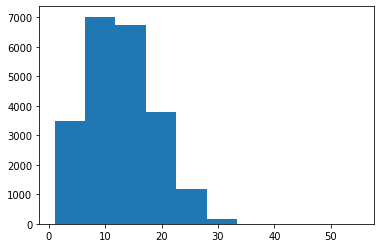

In [25]:
#check how long are the sequences so we got same lengths

lenghts = []
for i in range(len(X_train)):
  lenghts.append(len(X_train[i]))

#plot histogram to see what's going on

plt.hist(lenghts)

In [26]:
#conver to pandas series to check statistical scores
pd.Series(lenghts).describe()

count    22373.000000
mean        12.692308
std          5.929912
min          1.000000
25%          8.000000
50%         12.000000
75%         17.000000
max         55.000000
dtype: float64

On average the length is 12 so we have to pad the difference to make all examples the same length

In [27]:
def padX(X, max_len=57):
  x_copy = deepcopy(X)

  for i, x in enumerate(X):
    actual_len = np.array(x).shape[0]
    diff = max_len - actual_len
    pad = np.zeros(shape=(diff, 50))
    x_copy[i] = np.concatenate([x, pad])
    
  return np.array(x_copy).astype(float)


In [28]:
X_train = padX(X_train)
X_train.shape , y_train.shape

((22373, 57, 50), (22373,))

In [29]:
X_val = padX(X_val)
X_test = padX(X_test)


In [30]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential

model = Sequential([])
model.add(layers.Input(shape = (57, 50)))
model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(64, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 57, 128)           91648     
                                                                 
 dropout (Dropout)           (None, 57, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 57, 64)            49408     
                                                                 
 dropout_1 (Dropout)         (None, 57, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 57, 32)            12416     
                                                                 
 dropout_2 (Dropout)         (None, 57, 32)            0         
                                                                 
 flatten (Flatten)           (None, 1824)              0

In [31]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from tensorflow.keras.callbacks import ModelCheckpoint

#cp = ModelCheckpoint('model/', save_best_only=True)

model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy', AUC(name='auc')])

In [32]:
#because the dataset is inbalanced, try to pay attention to the "hate" examples

frequencies = pd.value_counts(df['label'])
weights = {0: frequencies.sum() / frequencies[0], 1: frequencies.sum() / frequencies[1]}

In [33]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, class_weight=weights)

Epoch 1/20
700/700 [==============================] - 46s 50ms/step - loss: 0.9684 - accuracy: 0.7470 - auc: 0.8494 - val_loss: 0.4200 - val_accuracy: 0.8181 - val_auc: 0.8903
Epoch 2/20
700/700 [==============================] - 33s 48ms/step - loss: 0.8027 - accuracy: 0.8188 - auc: 0.8981 - val_loss: 0.5357 - val_accuracy: 0.7607 - val_auc: 0.8979
Epoch 3/20
700/700 [==============================] - 34s 49ms/step - loss: 0.7710 - accuracy: 0.8281 - auc: 0.9064 - val_loss: 0.4214 - val_accuracy: 0.8108 - val_auc: 0.9054
Epoch 4/20
700/700 [==============================] - 33s 48ms/step - loss: 0.7477 - accuracy: 0.8289 - auc: 0.9124 - val_loss: 0.3290 - val_accuracy: 0.8688 - val_auc: 0.9105
Epoch 5/20
700/700 [==============================] - 33s 47ms/step - loss: 0.7193 - accuracy: 0.8415 - auc: 0.9192 - val_loss: 0.3061 - val_accuracy: 0.8700 - val_auc: 0.9100
Epoch 6/20
700/700 [==============================] - 33s 47ms/step - loss: 0.6938 - accuracy: 0.8438 - auc: 0.9249 - va

In [34]:
test_predictions = (model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      4454
           1       0.28      0.88      0.43       341

    accuracy                           0.83      4795
   macro avg       0.63      0.85      0.66      4795
weighted avg       0.94      0.83      0.87      4795

